# adult

In [1]:
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings("ignore")
pd.set_option("display.max_column",None)

In [2]:
adult_df=pd.read_csv(r'C:\Users\hp\Adult\adult_data.csv',header=None, delimiter=' *, *')
adult_df.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [3]:
adult_df.shape

(32561, 15)

In [4]:
adult_df.columns = ['age', 'workclass', 'fnlwgt', 'education', 'education_num',
'marital_status', 'occupation', 'relationship',
'race', 'sex', 'capital_gain', 'capital_loss',
'hours_per_week', 'native_country', 'income']

adult_df.head()

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [5]:
#create a copy of the dataframe
adult_df_rev=pd.DataFrame.copy(adult_df)


In [6]:
adult_df_rev=adult_df_rev.drop(["education","fnlwgt"],axis=1) #multivariable need to drop use [ ] this bracket and axis is column

In [7]:
adult_df_rev.isnull().sum()

age               0
workclass         0
education_num     0
marital_status    0
occupation        0
relationship      0
race              0
sex               0
capital_gain      0
capital_loss      0
hours_per_week    0
native_country    0
income            0
dtype: int64

In [8]:
adult_df_rev=adult_df_rev.replace(['?'], np.nan)

In [9]:
adult_df_rev.isnull().sum()

age                  0
workclass         1836
education_num        0
marital_status       0
occupation        1843
relationship         0
race                 0
sex                  0
capital_gain         0
capital_loss         0
hours_per_week       0
native_country     583
income               0
dtype: int64

In [10]:
adult_df_rev.dtypes # attribute so no ()

age                int64
workclass         object
education_num      int64
marital_status    object
occupation        object
relationship      object
race              object
sex               object
capital_gain       int64
capital_loss       int64
hours_per_week     int64
native_country    object
income            object
dtype: object

In [11]:
adult_df_rev.columns

Index(['age', 'workclass', 'education_num', 'marital_status', 'occupation',
       'relationship', 'race', 'sex', 'capital_gain', 'capital_loss',
       'hours_per_week', 'native_country', 'income'],
      dtype='object')

In [12]:
#replace the misssing value with mode value
for value in['workclass', 'occupation', 'native_country']:
    adult_df_rev[value].fillna(adult_df_rev[value].mode()[0],inplace=True)
        #adult_df_rev[value]=adult_df_rev[value].fillna(adult_df_rev[value].mode()[0],inplace=True)

In [13]:
adult_df_rev.workclass.mode()[0]

'Private'

In [14]:
adult_df_rev.isnull().sum()
adult_df_rev.head()

,age,workclass,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,income
0,39,State-gov,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [15]:
"""
for x in adult_df_rev.columns[:]:
if adult_df_rev[x].dtype=='object':
    adult_df_rev[x].fillna(adult_df_rev[x].mode()[0],inplace=True)
elif adult_df_rev[x].dtype=='int64' or adult_df_rev[x].dtype=='float64':
     adult_df_rev[x].fillna(adult_df_rev[x].mean(),inplace=True)
"""
#generic code for the dATATYPE FOR FILLNA

"\nfor x in adult_df_rev.columns[:]:\nif adult_df_rev[x].dtype=='object':\n    adult_df_rev[x].fillna(adult_df_rev[x].mode()[0],inplace=True)\nelif adult_df_rev[x].dtype=='int64' or adult_df_rev[x].dtype=='float64':\n     adult_df_rev[x].fillna(adult_df_rev[x].mean(),inplace=True)\n"

In [16]:
colname=[]
for x in adult_df_rev.columns:
    if adult_df_rev[x].dtype=='object':
        colname.append(x)
colname

['workclass',
 'marital_status',
 'occupation',
 'relationship',
 'race',
 'sex',
 'native_country',
 'income']

In [17]:

# For preprocessing the data
from sklearn import preprocessing

le=preprocessing.LabelEncoder()

for x in colname:
     adult_df_rev[x]=le.fit_transform(adult_df_rev[x])
#le_name_mapping = dict(zip(le.classes_, le.transform(le.classes_)))
#print('Feature', x)
#print('mapping', le_name_mapping)


In [18]:
adult_df_rev.head()
#0---=<=50k
#1---=>50k

,age,workclass,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,income
0,39,6,13,4,0,1,4,1,2174,0,40,38,0
1,50,5,13,2,3,0,4,1,0,0,13,38,0
2,38,3,9,0,5,1,4,1,0,0,40,38,0
3,53,3,7,2,5,0,2,1,0,0,40,38,0
4,28,3,13,2,9,5,2,0,0,0,40,4,0


In [19]:
adult_df_rev.dtypes

age               int64
workclass         int32
education_num     int64
marital_status    int32
occupation        int32
relationship      int32
race              int32
sex               int32
capital_gain      int64
capital_loss      int64
hours_per_week    int64
native_country    int32
income            int32
dtype: object

In [20]:
X=adult_df_rev.values[:,:-1]
Y=adult_df_rev.values[:,-1]

In [21]:
#scaling the data help to improvised the data (drastically cut down the range)
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
scaler.fit(X) #Learn (train the scaler object,and decide upon the new ranges to be applied  )
X=scaler.transform(X) #actually range to the original the value (and transform will seek the ranges from the object and transform the original; value with the scale value)
print(X)

[[ 0.03067056  2.62429763  1.13473876 ... -0.21665953 -0.03542945
   0.26136999]
 [ 0.83710898  1.72109965  1.13473876 ... -0.21665953 -2.22215312
   0.26136999]
 [-0.04264203 -0.08529633 -0.42005962 ... -0.21665953 -0.03542945
   0.26136999]
 ...
 [ 1.42360965 -0.08529633 -0.42005962 ... -0.21665953 -0.03542945
   0.26136999]
 [-1.21564337 -0.08529633 -0.42005962 ... -0.21665953 -1.65522476
   0.26136999]
 [ 0.98373415  0.81790166 -0.42005962 ... -0.21665953 -0.03542945
   0.26136999]]


In [22]:
#np.set_printoptions(threshold=np.inf)

In [23]:
Y=Y.astype(int)

# running a basic model(splitting the data)

In [24]:
from sklearn.model_selection import train_test_split
#Split in the data into test and train
X_train, X_test, Y_train, Y_test=train_test_split(X,Y, test_size=0.3, random_state=10)

In [25]:
from sklearn.linear_model import LogisticRegression
#Create a model
classifier=LogisticRegression()
#fitting training data to the model
classifier.fit(X_train,Y_train)
Y_pred=classifier.predict(X_test)
#print(list(zip(Y_test,Y_pred)))
print(classifier.coef_)
print(classifier.intercept_)


[[ 0.47898827 -0.10448293  0.86285082 -0.3481469  -0.0165719  -0.18074806
   0.11569239  0.42805994  2.4277355   0.28594931  0.37942052  0.00878949]]
[-1.50131013]


In [26]:
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
cfm=confusion_matrix(Y_test,Y_pred)
print(cfm)
print("Classification report:")
print(classification_report(Y_test, Y_pred))
acc=accuracy_score(Y_test, Y_pred)
print("Accuracy of the model:",acc)

[[7017  406]
 [1316 1030]]
Classification report:
              precision    recall  f1-score   support

           0       0.84      0.95      0.89      7423
           1       0.72      0.44      0.54      2346

    accuracy                           0.82      9769
   macro avg       0.78      0.69      0.72      9769
weighted avg       0.81      0.82      0.81      9769

Accuracy of the model: 0.8237281195618794


In [27]:
#store the predicted probabilities
y_pred_prob=classifier.predict_proba(X_test)
print(y_pred_prob)

[[0.96860653 0.03139347]
 [0.97030158 0.02969842]
 [0.23862252 0.76137748]
 ...
 [0.81402337 0.18597663]
 [0.82524908 0.17475092]
 [0.1567879  0.8432121 ]]


In [28]:
y_pred_class=[]
for value in y_pred_prob[:,1]:
    if value>0.46:
        y_pred_class.append(1)
    else:
            y_pred_class.append(0)
            print(y_pred_prob)

[[0.96860653 0.03139347]
 [0.97030158 0.02969842]
 [0.23862252 0.76137748]
 ...
 [0.81402337 0.18597663]
 [0.82524908 0.17475092]
 [0.1567879  0.8432121 ]]
[[0.96860653 0.03139347]
 [0.97030158 0.02969842]
 [0.23862252 0.76137748]
 ...
 [0.81402337 0.18597663]
 [0.82524908 0.17475092]
 [0.1567879  0.8432121 ]]
[[0.96860653 0.03139347]
 [0.97030158 0.02969842]
 [0.23862252 0.76137748]
 ...
 [0.81402337 0.18597663]
 [0.82524908 0.17475092]
 [0.1567879  0.8432121 ]]
[[0.96860653 0.03139347]
 [0.97030158 0.02969842]
 [0.23862252 0.76137748]
 ...
 [0.81402337 0.18597663]
 [0.82524908 0.17475092]
 [0.1567879  0.8432121 ]]
[[0.96860653 0.03139347]
 [0.97030158 0.02969842]
 [0.23862252 0.76137748]
 ...
 [0.81402337 0.18597663]
 [0.82524908 0.17475092]
 [0.1567879  0.8432121 ]]
[[0.96860653 0.03139347]
 [0.97030158 0.02969842]
 [0.23862252 0.76137748]
 ...
 [0.81402337 0.18597663]
 [0.82524908 0.17475092]
 [0.1567879  0.8432121 ]]
[[0.96860653 0.03139347]
 [0.97030158 0.02969842]
 [0.23862252 0

In [29]:
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
cfm=confusion_matrix(Y_test,y_pred_class)
print(cfm)
acc=accuracy_score(Y_test, y_pred_class)
print(classification_report(Y_test, y_pred_class))
print("Accuracy of the model:",acc)

[[6910  513]
 [1208 1138]]
              precision    recall  f1-score   support

           0       0.85      0.93      0.89      7423
           1       0.69      0.49      0.57      2346

    accuracy                           0.82      9769
   macro avg       0.77      0.71      0.73      9769
weighted avg       0.81      0.82      0.81      9769

Accuracy of the model: 0.8238304841846658


In [30]:
#for a in np.arange(0.4,0.61,0.01):
 #   predict_mine = np.where(y_pred_prob[:,1] > a, 1, 0)
  #   cfm=confusion_matrix(Y_test, predict_mine)
    #    total_err=cfm[0,1]+cfm[1,0]
     #   print("Errors at threshold ", a, ":",total_err, " , type 2 error :",
      #cfm[1,0]," , type 1 error:", cfm[0,1])

In [31]:
for a in np.arange(0.4,0.61,0.01):
    predict_mine = np.where(y_pred_prob[:,1] > a, 1, 0)
    cfm=confusion_matrix(Y_test, predict_mine)
    total_err=cfm[0,1]+cfm[1,0]
    print("Errors at threshold ", a, ":",total_err, " , type 2 error :",
        cfm[1,0]," , type 1 error:", cfm[0,1])

Errors at threshold  0.4 : 1768  , type 2 error : 1072  , type 1 error: 696
Errors at threshold  0.41000000000000003 : 1748  , type 2 error : 1096  , type 1 error: 652
Errors at threshold  0.42000000000000004 : 1749  , type 2 error : 1115  , type 1 error: 634
Errors at threshold  0.43000000000000005 : 1760  , type 2 error : 1144  , type 1 error: 616
Errors at threshold  0.44000000000000006 : 1753  , type 2 error : 1168  , type 1 error: 585
Errors at threshold  0.45000000000000007 : 1734  , type 2 error : 1189  , type 1 error: 545
Errors at threshold  0.4600000000000001 : 1721  , type 2 error : 1208  , type 1 error: 513
Errors at threshold  0.4700000000000001 : 1717  , type 2 error : 1232  , type 1 error: 485
Errors at threshold  0.4800000000000001 : 1727  , type 2 error : 1268  , type 1 error: 459
Errors at threshold  0.4900000000000001 : 1722  , type 2 error : 1295  , type 1 error: 427
Errors at threshold  0.5000000000000001 : 1722  , type 2 error : 1316  , type 1 error: 406
Errors at

In [32]:
from sklearn import metrics
fpr, tpr, z =metrics.roc_curve(Y_test,y_pred_prob[:,1])
auc=metrics.auc(fpr,tpr)
print(auc)

0.8510128825880344


In [33]:
import matplotlib.pyplot as plt
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')

plt.show()


<Figure size 640x480 with 1 Axes>

In [34]:
y_pred_class=[]
for value in y_pred_prob[:,1]:
    if value>0.46:
        y_pred_class.append(1)
    else:
            y_pred_class.append(0)
            print(y_pred_prob)

[[0.96860653 0.03139347]
 [0.97030158 0.02969842]
 [0.23862252 0.76137748]
 ...
 [0.81402337 0.18597663]
 [0.82524908 0.17475092]
 [0.1567879  0.8432121 ]]
[[0.96860653 0.03139347]
 [0.97030158 0.02969842]
 [0.23862252 0.76137748]
 ...
 [0.81402337 0.18597663]
 [0.82524908 0.17475092]
 [0.1567879  0.8432121 ]]
[[0.96860653 0.03139347]
 [0.97030158 0.02969842]
 [0.23862252 0.76137748]
 ...
 [0.81402337 0.18597663]
 [0.82524908 0.17475092]
 [0.1567879  0.8432121 ]]
[[0.96860653 0.03139347]
 [0.97030158 0.02969842]
 [0.23862252 0.76137748]
 ...
 [0.81402337 0.18597663]
 [0.82524908 0.17475092]
 [0.1567879  0.8432121 ]]
[[0.96860653 0.03139347]
 [0.97030158 0.02969842]
 [0.23862252 0.76137748]
 ...
 [0.81402337 0.18597663]
 [0.82524908 0.17475092]
 [0.1567879  0.8432121 ]]
[[0.96860653 0.03139347]
 [0.97030158 0.02969842]
 [0.23862252 0.76137748]
 ...
 [0.81402337 0.18597663]
 [0.82524908 0.17475092]
 [0.1567879  0.8432121 ]]
[[0.96860653 0.03139347]
 [0.97030158 0.02969842]
 [0.23862252 0

In [35]:
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
cfm=confusion_matrix(Y_test,y_pred_class)
print(cfm)
acc=accuracy_score(Y_test, y_pred_class)
print(classification_report(Y_test, y_pred_class))
print("Accuracy of the model:",acc)

[[6910  513]
 [1208 1138]]
              precision    recall  f1-score   support

           0       0.85      0.93      0.89      7423
           1       0.69      0.49      0.57      2346

    accuracy                           0.82      9769
   macro avg       0.77      0.71      0.73      9769
weighted avg       0.81      0.82      0.81      9769

Accuracy of the model: 0.8238304841846658


In [36]:
from sklearn import metrics
fpr, tpr, z =metrics.roc_curve(Y_test,y_pred_class)
auc=metrics.auc(fpr,tpr)
print(auc)

0.7079857322331378


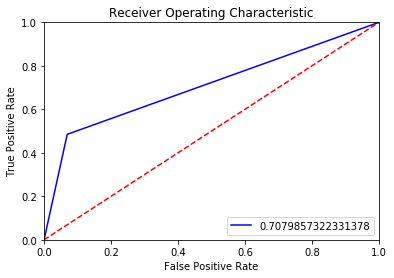

In [37]:
import matplotlib.pyplot as plt
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')

plt.show()

In [38]:
#when we are confuse between multiple threshold we can find out the AUC value for each of the threshold and finally conclude upon 
#that threshold value which give us auc nearest to the overall AUC 

In [42]:
#Using cross validation

classifier=LogisticRegression()

#performing kfold_cross_validation
from sklearn.model_selection import KFold
kfold_cv=KFold(n_splits=10,random_state=10)
print(kfold_cv)

from sklearn.model_selection import cross_val_score
#running the model using scoring metric as accuracy
kfold_cv_result=cross_val_score(estimator=classifier,X=X_train,
y=Y_train, cv=kfold_cv)
print(kfold_cv_result)
#finding the mean
print(kfold_cv_result.mean())

KFold(n_splits=10, random_state=10, shuffle=False)
[0.81842105 0.81403509 0.81790259 0.85037297 0.82974989 0.82492321
 0.80824923 0.8174638  0.83106626 0.82843352]
0.8240617614681722


In [44]:
for train_value, test_value in kfold_cv.split(X_train):
    classifier.fit(X_train[train_value], Y_train[train_value]).predict(X_train[test_value])#first 9 fold


Y_pred=classifier.predict(X_test)#last fold 
#print(list(zip(Y_test,Y_pred)))

In [45]:
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
cfm=confusion_matrix(Y_test,Y_pred)
print(cfm)
print()
print("Classification report:")
print(classification_report(Y_test, Y_pred))
acc=accuracy_score(Y_test, Y_pred)

print("Accuracy of the model:",acc)

[[7016  407]
 [1315 1031]]

Classification report:
              precision    recall  f1-score   support

           0       0.84      0.95      0.89      7423
           1       0.72      0.44      0.54      2346

    accuracy                           0.82      9769
   macro avg       0.78      0.69      0.72      9769
weighted avg       0.81      0.82      0.81      9769

Accuracy of the model: 0.8237281195618794
